# **Código para crear el CSV y el DataFrame**
---
######Antes de ejecutar los siguientes fragmentos de código hay que crearse el directorio: "/MASTER/TFM" en el drive (para no tener que cambiar las rutas) y hay que descomprimir el zip "*dataset-resized.zip*". Tras hacer esto hay que eliminar el archivo con el nombre ".DS_Store" de la carpeta "*dataset-resized*".

 > **DataFrame**:


1.   Image : *Imagen del objeto*
2.   Category : *Categoría a la que pertenece el objeto*


 > **Categorías**:


*   Cardboard
*   Glass
*   Metal
*   Paper
*   Plastic


























In [22]:
# Librerías
import os
import pandas as pd
import base64
from PIL import Image
import os
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [23]:
# 1- Copiamos y descomprimimos el zip dataset-resized en el el directorio /MASTER/TFM
# 2- Eliminamos el archivo .DS_Store de la carpeta dataset-resized

# Montamos Drive en Google Colab
from google.colab import drive

# OJO: Pide que te autentiques con tu cuenta de Google y que autorices el acceso
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
directorio = "/content/drive/MyDrive/MASTER/TFM/dataset-resized"
# Dataset en el que almacenaremos las imágenes y las categorías
dataset = []
#Añadimos las imagenes con su correspondiente categoría
for root, dirs, files in os.walk(directorio):
  for file in files:
    # Obtener el nombre de la carpeta en la que se encuentra la imagen (categoría)
    nombre_carpeta = os.path.basename(root)

    ruta_imagen = os.path.join(root, file)
    imagen = Image.open(ruta_imagen)
    with open(ruta_imagen, "rb") as f:
      imagen_base64 = base64.b64encode(f.read()).decode("utf-8")

    dataset.append((imagen_base64, nombre_carpeta))

In [25]:
# Resultado de la lista
primeros_10 = dataset[:10]
print(primeros_10)

[('/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAGAAgADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD1HPFMNApM5NbkCGkpTTaACkpaSmMDSUUUhBRSGjNAxaSjNLQAUUUlAhaTNFHagYE0U0migQ7NNzQTSZoAM0hNGaQ0ABpppaQ0gENFJSZpgLSUZppOKAHUUzdS5pALmjNNzRmgB2aKbmjNAD80ZpuaM0ASClFRg08GgCQGn

In [26]:
# Crearmos el DataFrame
df = pd.DataFrame(dataset, columns=['image', 'category'])

# Guardar el DataFrame como un CSV
ruta_csv = "/content/drive/MyDrive/MASTER/TFM/DataSet.csv"
df.to_csv(ruta_csv, index=False)

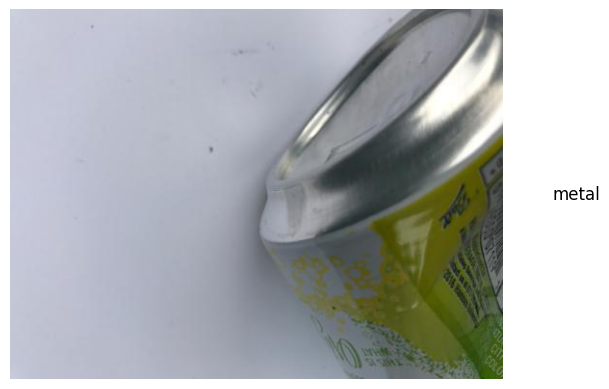

In [31]:
# Probamos como sería crear un DataFrame a partir del csv creado en el paso anterior
# Recuperamos la primera imagen y la transformamos de base64 a jpg

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("/content/drive/MyDrive/MASTER/TFM/DataSet.csv")

primera_fila = df.iloc[0]

ruta_imagen = "imagen.jpg"

imagen_bytes = base64.b64decode(imagen_base64)

with open(ruta_imagen, "wb") as f:
    f.write(imagen_bytes)

imagen = mpimg.imread(ruta_imagen)

fig, ax = plt.subplots()
ax.imshow(imagen)
ax.axis('off')  # Ocultar los ejes
texto = primera_fila["category"]
ax.text(1.1, 0.5, texto, fontsize=12, verticalalignment='center', transform=ax.transAxes)

plt.show()